In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import os
from random import shuffle

In [ ]:
TRAIN_DIR = '/content/train'
TEST_DIR = '/content/test'

In [ ]:
IMG_SIZE = 120
MODEL_NAME = 'NIKEvsADIDAS'

In [ ]:
def label_image(img):
  word_label = img.split('_')[0]
  if word_label == 'NIKE': return [1,0]
  elif word_label == 'ADIDAS': return [0,1]

In [ ]:
train_data = []
for img in tqdm(os.listdir(TRAIN_DIR)):
  label = label_image(img)
  path = os.path.join(TRAIN_DIR,img)

  # PIL
  img = Image.open(path)
  img = img.convert('L')
  img = img.resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS)
  #Create composite image by blending images using a transparency mask. ..
  # ANTIALIAS (a high-quality downsampling filter).

  train_data.append([np.array(img), np.array(label)])

shuffle(train_data)

100%|██████████| 100/100 [00:00<00:00, 343.06it/s]


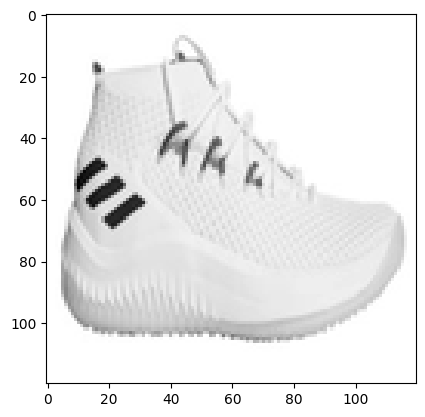

In [ ]:
plt.imshow(train_data[35][0], cmap='gist_gray')
plt.show()

In [ ]:
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(32,(5,5), activation='relu', input_shape=(120,120,1)))
model.add(Conv2D(32,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5), activation='relu'))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5), activation='relu'))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax')) #adidas or nike 2 options so last layer has 2 neurons.

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
x = np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array([i[1] for i in train_data])

model.fit(x,y,epochs=10)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.4663 - loss: 140.7402
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6025 - loss: 3.6049
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4972 - loss: 1.1446
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5931 - loss: 0.6834
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5285 - loss: 0.7081
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5195 - loss: 0.7198
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6376 - loss: 0.6522
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6644 - loss: 0.6604
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6491 - loss: 0.6437
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7260 - loss: 0.5509


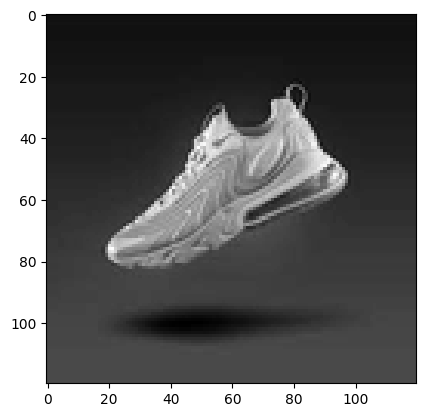

In [ ]:
# PIL
img = Image.open('/content/niketest.jpg')
img = img.convert('L')
img = img.resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS)

plt.imshow(np.array(img), cmap='gist_gray')
plt.show()

In [ ]:
model.predict(np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


array([[0.38787028, 0.6121297 ]], dtype=float32)